In [1]:
# Bike Sharing Demand prediction Project for the hourly dataset


# Step 0 - Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:

# Step 1 - Read the data

bikes = pd.read_csv('hour.csv')

In [3]:


bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)

bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

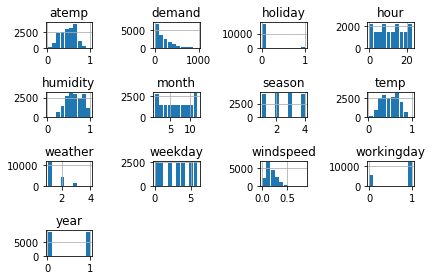

In [4]:
# Create pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

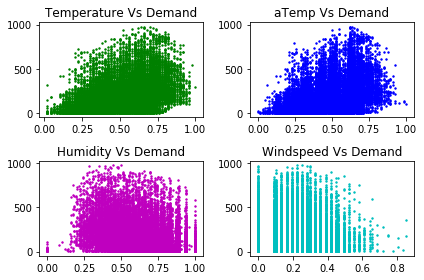

In [5]:

# Step 3 - Data Visualisation


# Visualise the continuous features Vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()

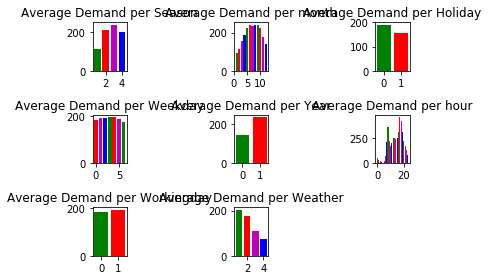

In [6]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

In [7]:
# Check for outliers

bikes_prep['demand'].describe()

bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [8]:

# Step 4 - Check Multiple Linear Regression Assumptions


# Linearity using correlation coefficient matrix using corr
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x24e4dde2f28>)

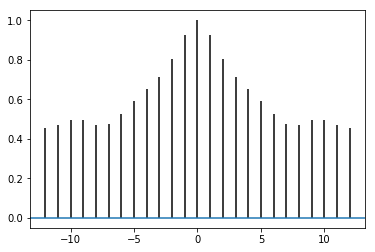

In [9]:
# Autocorrelation of demand using acor
dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)

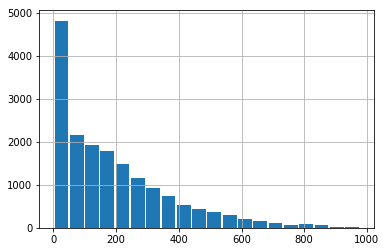

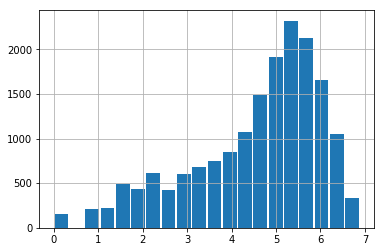

In [10]:

# Step 6 - Create/Modify new features

# Log Normalise the feature 'Demand'
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [11]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()

In [12]:

# Step 7 - Create Dummy Variables and drop first to avoid dummy variables trap



bikes_prep_lag.dtypes

bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [13]:
bikes_prep_lag.head()

,year,weekday,workingday,temp,atemp,humidity,windspeed,demand,t-1,t-2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0,6,0,0.24,0.2879,0.75,0.0000,2.564949,3.465736,3.688879,...,0,0,0,0,0,0,0,0,0,0
4,0,6,0,0.24,0.2879,0.75,0.0000,0.000000,2.564949,3.465736,...,0,0,0,0,0,0,0,0,0,0
5,0,6,0,0.24,0.2576,0.75,0.0896,0.000000,0.000000,2.564949,...,0,0,0,0,0,0,0,1,0,0
6,0,6,0,0.22,0.2727,0.80,0.0000,0.693147,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,0,6,0,0.20,0.2576,0.86,0.0000,1.098612,0.693147,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [14]:

# Step 8 - Create Train and test split


# Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)


Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [15]:

# Step 9 - Fit and Score the model 
# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)

In [16]:
# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
print(rmse)

0.3593312608133159


In [17]:
# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.3354505623574812
